# Step 1: Data Collection

In [171]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [172]:
# Rainfall data in mtalbert
rain = pd.read_csv('../Tamaki/MtAlbertGrammerRainfallHourly.csv', index_col='Timestamp (UTC+12:00)', parse_dates=True)
rain.head(5)

# smheadtail = (np.r_[0:5, -5:0])
rainheadtail = rain.iloc[np.r_[0:5, -5:0]]
print(rainheadtail)

                       Rain(mm)
Timestamp (UTC+12:00)          
2019-05-26 00:00:00         0.0
2019-05-26 01:00:00         0.0
2019-05-26 02:00:00         0.0
2019-05-26 03:00:00         0.0
2019-05-26 04:00:00         0.0
2024-10-19 19:00:00         0.0
2024-10-19 20:00:00         0.0
2024-10-19 21:00:00         0.0
2024-10-19 22:00:00         0.0
2024-10-19 23:00:00         0.0


In [173]:
# Soil Temperature data in mtalbert
st = pd.read_csv('../Tamaki//MtAlbertGrammerSoilTempHourly.csv',index_col='Timestamp (UTC+12:00)', parse_dates=True)
st.head(5)

# smheadtail = (np.r_[0:5, -5:0])
stheadtail = st.iloc[np.r_[0:5, -5:0]]
print(stheadtail)

                       SoilTemp(c)
Timestamp (UTC+12:00)             
2019-05-26 00:00:00      14.869875
2019-05-26 01:00:00      14.751500
2019-05-26 02:00:00      14.694500
2019-05-26 03:00:00      14.648250
2019-05-26 04:00:00      14.494625
2024-10-19 19:00:00      16.812500
2024-10-19 20:00:00      16.725000
2024-10-19 21:00:00      16.587500
2024-10-19 22:00:00      16.412500
2024-10-19 23:00:00      16.312500


In [174]:
# Soil Moisture data in mtalbert
sm = pd.read_csv('../Tamaki/MtAlbertGrammerSoilMoistureHourly.csv',index_col='Timestamp (UTC+12:00)', parse_dates=True)
sm.head(5)

# smheadtail = (np.r_[0:5, -5:0])
smheadtail = sm.iloc[np.r_[0:5, -5:0]]
print(smheadtail)

                       SoilMoisture(%)
Timestamp (UTC+12:00)                 
2018-07-07 12:00:00          37.521875
2018-07-07 13:00:00          37.543375
2018-07-07 14:00:00          37.343375
2018-07-07 15:00:00          37.351250
2018-07-07 16:00:00          37.353125
2024-10-28 03:00:00          47.165125
2024-10-28 04:00:00          47.171000
2024-10-28 05:00:00          47.127875
2024-10-28 06:00:00          47.130250
2024-10-28 07:00:00          47.132875


Data Description

In [175]:
# Display info to check datatype
print("Mt Albert Rainfall Data Info:")
rain.info()
print("\nMt Albert Soil Temperature Data Info:")
st.info()
print("\nMt Albert Soil Moisture Data Info:")
sm.info()

Mt Albert Rainfall Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47376 entries, 2019-05-26 00:00:00 to 2024-10-19 23:00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rain(mm)  47376 non-null  float64
dtypes: float64(1)
memory usage: 740.2 KB

Mt Albert Soil Temperature Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47376 entries, 2019-05-26 00:00:00 to 2024-10-19 23:00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SoilTemp(c)  47376 non-null  float64
dtypes: float64(1)
memory usage: 740.2 KB

Mt Albert Soil Moisture Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55316 entries, 2018-07-07 12:00:00 to 2024-10-28 07:00:00
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SoilMoisture(%)  55299 non-null  float64
d

In [176]:
sm = sm.dropna()

In [177]:
# Overview of data
print("Mt Albert Rain statistics :")
print(rain.describe())
print(st.describe())
print(sm.describe())


Mt Albert Rain statistics :
           Rain(mm)
count  47376.000000
mean       0.152912
std        0.877311
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       43.161026
        SoilTemp(c)
count  47376.000000
mean      17.127572
std        3.625300
min        9.400000
25%       13.912500
50%       16.900000
75%       20.312500
max       25.350000
       SoilMoisture(%)
count     55299.000000
mean         43.188923
std           4.828777
min          34.344750
25%          39.222125
50%          42.964500
75%          46.948625
max          53.103500


Data Cleaning


In [178]:
# Display missing value
print("Missing Value in Rainfall Data")
rain.isna().sum()
# print(rain[rain['Rain(mm)'].isnull()])


Missing Value in Rainfall Data


Rain(mm)    0
dtype: int64

In [179]:
# Display missing value

print("Missing Value in Soil Temperature Data")
st.isna().sum()
# print(st[st['SoilTemp(c)'].isnull()])


Missing Value in Soil Temperature Data


SoilTemp(c)    0
dtype: int64

In [180]:
# Display missing value
print("'Missing Value in Soil Moisture Data")
sm.isna().sum()
# print(sm[sm['SoilMoisture(%)'].isnull()])

'Missing Value in Soil Moisture Data


SoilMoisture(%)    0
dtype: int64

# Step 2: Handle Missing Values

In [181]:
sm = sm.interpolate(method="linear", limit_direction='both', axis=0)

In [182]:

st.interpolate(method='linear', inplace=True)

# soil moisture and soil temperature using linear to fill data
rain.fillna(0, inplace=True)


In [183]:
# double check missing value

# sm.isna().sum()
# st.isna().sum()
# rain.isna().sum()


# Step 3: Resample Data to 15 minutes interval

<Axes: xlabel='Timestamp (UTC+12:00)'>

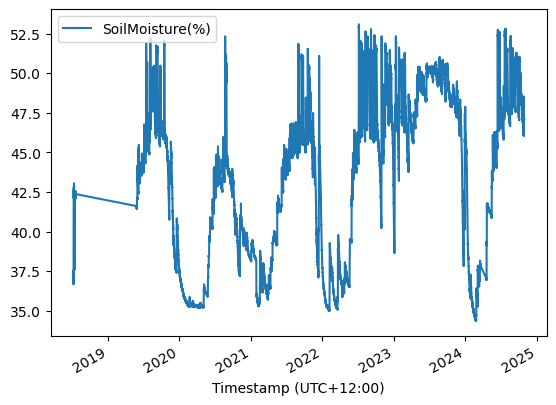

In [184]:
sm.plot()

In [185]:
mean_moisture = sm['SoilMoisture(%)'].mean()
std_moisture = sm['SoilMoisture(%)'].std()

# Define thresholds for outliers
lower_threshold = mean_moisture - 2 * std_moisture
upper_threshold = mean_moisture + 2 * std_moisture

# Find rows with unusual values
troubling_rows = sm[(sm['SoilMoisture(%)'] < lower_threshold) | (sm['SoilMoisture(%)'] > upper_threshold)]

# Display the troubling rows
print(troubling_rows)

                       SoilMoisture(%)
Timestamp (UTC+12:00)                 
2022-07-05 21:00:00          52.862875
2022-07-06 05:00:00          52.918125
2022-07-06 06:00:00          52.978250
2022-07-06 07:00:00          52.990500
2022-07-06 08:00:00          52.939500
2022-07-06 09:00:00          52.949125
2022-07-06 10:00:00          52.883125
2022-07-06 11:00:00          52.953625
2022-07-06 12:00:00          52.961375
2022-07-06 13:00:00          52.959000
2022-07-06 14:00:00          53.103500
2022-07-06 15:00:00          53.035375
2022-07-06 16:00:00          52.993875
2022-07-06 17:00:00          52.936875
2022-07-06 18:00:00          52.885875


In [186]:
mean_soiltemp = st['SoilTemp(c)'].mean()
std_soiltemp = st['SoilTemp(c)'].std()

# Define thresholds for outliers
lower_threshold = mean_soiltemp - 2 * std_soiltemp
upper_threshold = mean_soiltemp + 2 * std_soiltemp

# Find rows with unusual values
troubling_rows = st[(st['SoilTemp(c)'] < lower_threshold) | 
                          (st['SoilTemp(c)'] > upper_threshold)]

# Display the troubling rows
print(troubling_rows)

                       SoilTemp(c)
Timestamp (UTC+12:00)             
2021-07-04 10:00:00         9.8250
2021-07-04 11:00:00         9.8750
2021-07-05 05:00:00         9.8750
2021-07-05 06:00:00         9.7875
2021-07-05 07:00:00         9.7000
...                            ...
2024-01-31 21:00:00        24.4000
2024-02-01 17:00:00        24.4750
2024-02-01 18:00:00        24.5250
2024-02-01 19:00:00        24.4625
2024-02-01 20:00:00        24.3875

[214 rows x 1 columns]


<Axes: xlabel='Timestamp (UTC+12:00)'>

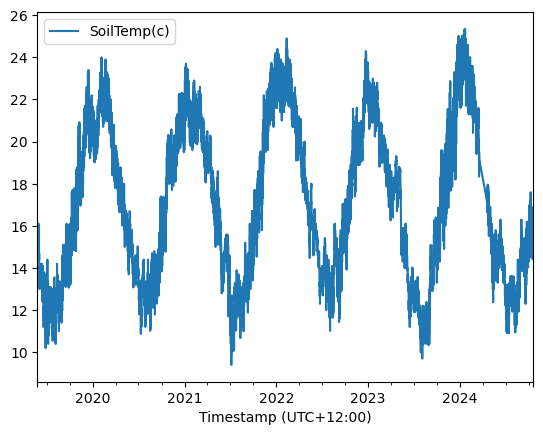

In [187]:
st.plot()

In [188]:
mean_rain = rain['Rain(mm)'].mean()
std_rain = rain['Rain(mm)'].std()

# Define thresholds for outliers
lower_threshold = mean_rain - 2 * std_rain
upper_threshold = mean_rain + 2 * std_rain

# Find rows with unusual values
troubling_rows = rain[(rain['Rain(mm)'] < lower_threshold) | (rain['Rain(mm)'] > upper_threshold)]

# Display the troubling rows
print(troubling_rows)

                       Rain(mm)
Timestamp (UTC+12:00)          
2019-05-27 12:00:00    2.410000
2019-05-28 13:00:00    1.930000
2019-05-31 05:00:00    1.950000
2019-05-31 06:00:00    2.656030
2019-05-31 08:00:00    5.479430
...                         ...
2024-10-05 13:00:00    8.669037
2024-10-06 20:00:00    3.000000
2024-10-09 00:00:00    2.000000
2024-10-09 08:00:00    2.000000
2024-10-13 19:00:00    3.500000

[1069 rows x 1 columns]


In [189]:
rain.max()

Rain(mm)    43.161026
dtype: float64

<Axes: xlabel='Timestamp (UTC+12:00)'>

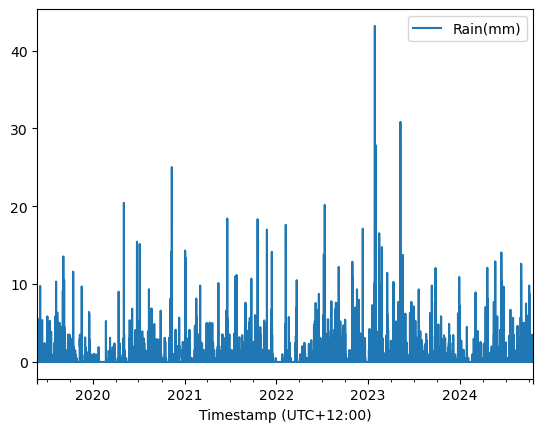

In [190]:
rain.plot()

In [191]:
# Check for mismatched timestamps before resampling
print(sm.index.min(), sm.index.max())
print(st.index.min(), st.index.max())
print(rain.index.min(), rain.index.max())

2018-07-07 12:00:00 2024-10-28 07:00:00
2019-05-26 00:00:00 2024-10-19 23:00:00
2019-05-26 00:00:00 2024-10-19 23:00:00


### Data overtime

# Step 4: Combine Data

In [192]:
# Determine the latest common start date
latest_start_date = max(rain.index.min(), sm.index.min(), st.index.min())
end_date = min(rain.index.max(), sm.index.max(), st.index.max())


In [193]:
# Filter datasets to the common time range
rainfall_hourly = rain[latest_start_date:end_date]
soil_temp_hourly = st[latest_start_date:end_date]
soil_moisture_hourly = sm[latest_start_date:end_date]


In [194]:
# Merge datasets on the timestamp
mtalbert_hourly = rainfall_hourly.join(soil_temp_hourly, how='inner', rsuffix='_rain')
mtalbert_hourly = mtalbert_hourly.join(soil_moisture_hourly, how='inner', rsuffix='_soil_temp')
mtalbert_hourly.dropna(inplace=True)  # Drop any rows with missing values after merging


In [195]:
mtalbert_hourly.head()

,Rain(mm),SoilTemp(c),SoilMoisture(%)
Timestamp (UTC+12:00),,,
2019-05-26 00:00:00,0.0,14.869875,41.620973
2019-05-26 01:00:00,0.0,14.751500,41.620873
2019-05-26 02:00:00,0.0,14.694500,41.620774
2019-05-26 03:00:00,0.0,14.648250,41.620674
2019-05-26 04:00:00,0.0,14.494625,41.620574


In [196]:
# Save the combined data to a new CSV file
mtalbert_hourly.to_csv('../AcrossStationData/MtAlbert_Data_Hourly.csv')
print("Combined data (1 hour intervals) saved successfully.")

Combined data (1 hour intervals) saved successfully.


In [197]:
# mtalbert = pd.read_csv('../Data/soil data/mtalbert-648717-20241008172730/MtAlbert_Data_15mins.csv', parse_dates=['Timestamp (UTC+12:00)'])
# mtalbert.head()

In [198]:
# mtalbert['Location'] = 'Central Auckland'
# mtalbert['Land position'] = 'Flat ridge'
# mtalbert['Slope(degree)'] = '0-3'
# mtalbert['Soil Order'] = 'Ultic'
# mtalbert['Soil Types / Series'] = 'Whareora sandy clay loam'
# mtalbert['NZ Soil Classification'] = 'Mottled Yellow Ultic'
# mtalbert['Soil Profile Description'] = '0-10cm dark grey sandy clay loam, structure crumbly when wet, likely to be granular when dry; 10-15cm dark grey sandy clay loam, mixing with yellow brown sandy clay; 15-40 yellow brown sandy clay with grey mottles, structure massive with sticky consistence when wet, likely to be nutty of blocky when dry'
# mtalbert['Pastoral land use'] = 'Mixed dairy and drystock'
# mtalbert.head()
# mtalbert.to_csv('../Data/soil data/mtalbert_soil_data.csv')

Data Transformation


Feature Engineering: Scaling, Normalization and Standardization


Feature Selection


Handling Imbalanced Data


Encoding Categorical Features


Data Splitting